In [104]:
def indices_Scrapping():
    import requests
    import bs4
    import psycopg2
    yahoo_path = "https://in.finance.yahoo.com/"
    yahoo_path2 = "https://finance.yahoo.com/world-indices/"
    
    conn=psycopg2.connect("dbname='stockdata' user='postgres' password='password'")
    cursor = conn.cursor()
    res = requests.get(yahoo_path)
    res1 = requests.get(yahoo_path2)

    soup = bs4.BeautifulSoup(res.text,'html.parser')
    soup2 = bs4.BeautifulSoup(res1.text,'html.parser')
    stock_var1,stock_var2,stock_var3,stock_var4,stock_var5 =[],[],[],[],[]
    stock_rf= {}
    stock_indices = {}

    for i in soup.find_all('span',attrs={"class":"Trsdu(0.3s) Fz(s) Mb(0px) D(b)"}):
        stock_var1.append(i.text)

    for j in soup.find_all('a',attrs={"class":"C(black) Fw(500) Fz(m) Td(n) Pend(34px) Pstart(10px) D(b)"}):
        stock_var2.append(j) 

    for k in range(len(stock_var2)):
        stock_var3.append(stock_var2[k]['title'])
    stock_indices = dict(zip(stock_var3,stock_var1))
    

    for m in soup.find_all('li'):
        for n in  m.findAll('span'):
            #print(m.a['title'])
            try:
                #print(" ".join(n['class']))
                if " ".join(n['class']).strip() == 'Trsdu(0.3s) Fz(s) D(b) C($dataGreen)':
                    stock_rf[m.a['title']] = n.text
                    #print(stock_var5)
                if " ".join(n['class']).strip() == "Trsdu(0.3s) Fz(s) D(b) C($dataRed)":
                    stock_rf[m.a['title']] = n.text
                    #print(stock_var5)
            except Exception as e: 
                pass
    for i in soup2.find_all('tr',attrs={"class":"data-row^NYA Bgc($extraLightBlue):h BdT Bdc($tableBorderGray) Bdc($tableBorderBlue):h H(33px) Bgc($altRowColor) Whs(nw)"}):
        for j in i.find_all('td'):
            if(j['data-reactid']) == '101':
                stock_indices['Nyse'] = j.text
        for j in i.find_all('span'):
            if(j['data-reactid']) == '105':
                stock_rf['Nyse'] = j.text
    for ii in stock_rf:
        stock_rf[ii] = stock_rf[ii].replace("%","").strip()
    for jj in stock_indices:
        stock_indices[jj] = stock_indices[jj].replace(',','').strip()
    print(stock_indices)
    print("______________________________________")
    print(stock_rf)
    query = """insert into stock.indices(sensex,sensex_change,nifty,nifty_change,dow,dow_change,nasdaq,nasdaq_change,hang_seng,hang_seng_change,\
nikkei,nikkei_change,nyse,nyse_change,usd_to_inr,usd_to_inr_change,eur_to_inr,eur_to_inr_change,gbp_to_inr,gbp_to_inr_change,\
aed_to_inr,aed_to_inr_change,inr_to_jpy,inr_to_jpy_change,sgd_to_inr,sgd_to_inr_change)""" + "values("+stock_indices['BSE SENSEX']+","\
+stock_rf['BSE SENSEX']+","+stock_indices['Nifty 50']+","+stock_rf['Nifty 50']+","\
+stock_indices['Dow']+","+stock_rf['Dow']+","+stock_indices['Nasdaq']+","+stock_rf['Nasdaq']+","\
+stock_indices['Hang Seng']+","+stock_rf['Hang Seng']+","+stock_indices['Nikkei']+","+stock_rf['Nikkei']+","\
+stock_indices['Nyse']+","+stock_rf['Nyse']+","+stock_indices['USD/INR']+","+stock_rf['USD/INR']+","\
+stock_indices['EUR/INR']+","+stock_rf['EUR/INR']+","+stock_indices['GBP/INR']+","+stock_rf['GBP/INR']+","+stock_indices['AED/INR']+","\
+stock_rf['AED/INR']+","+stock_indices['INR/JPY']+","+stock_rf['INR/JPY']+","\
+stock_indices['SGD/INR']+","+stock_rf['SGD/INR'] +");"
    print(query)
    print("___________________________________________")
    cursor.execute(query)
    conn.commit()
indices_Scrapping()

{'BSE SENSEX': '36021.87', 'Nifty 50': '10801.60', 'USD/INR': '70.5225', 'Dow': '23787.45', 'Nasdaq': '6897.00', 'BTC-INR': '297342.75', 'Hang Seng': '26462.320', 'Nikkei': '20427.06', 'EUR/INR': '80.8314', 'GBP/INR': '90.0226', 'AED/INR': '19.1460', 'INR/JPY': '1.5409', 'SGD/INR': '51.9930', 'Nyse': '11716.23'}
______________________________________
{'BSE SENSEX': '+0.11', 'Nifty 50': '-0.01', 'USD/INR': '+0.5597', 'Dow': '+1.09', 'Nasdaq': '+1.08', 'Hang Seng': '+2.27', 'Nikkei': '+1.10', 'EUR/INR': '+0.71', 'GBP/INR': '+0.97', 'AED/INR': '+0.50', 'INR/JPY': '-0.50', 'SGD/INR': '+0.66', 'Nyse': '+0.95'}
insert into stock.indices(sensex,sensex_change,nifty,nifty_change,dow,dow_change,nasdaq,nasdaq_change,hang_seng,hang_seng_change,nikkei,nikkei_change,nyse,nyse_change,usd_to_inr,usd_to_inr_change,eur_to_inr,eur_to_inr_change,gbp_to_inr,gbp_to_inr_change,aed_to_inr,aed_to_inr_change,inr_to_jpy,inr_to_jpy_change,sgd_to_inr,sgd_to_inr_change)values(36021.87,+0.11,10801.60,-0.01,23787.45,

In [88]:
import requests
import bs4
yahoo_path = "https://in.finance.yahoo.com/"

res = requests.get(yahoo_path)

soup = bs4.BeautifulSoup(res.text,'html.parser')
stock_var1 = []

for i in soup.find_all('span',attrs={"class":"Trsdu(0.3s) Fz(s) Mb(0px) D(b)"}):
    stock_var1.append(i.text)

    
print(stock_var1[2])

71.1590


In [12]:
soup.prettify()

'<!DOCTYPE html>\n<html class="NoJs featurephone" id="atomic" lang="en-IN">\n <head prefix="og: http://ogp.me/ns#">\n  <script>\n   window.performance && window.performance.mark && window.performance.mark(\'PageStart\');\n  </script>\n  <meta charset="utf-8"/>\n  <title>\n   Yahoo Finance - Business finance, stock market, quotes, news\n  </title>\n  <meta content="401k, business, financial information, investing, investor, market news, stock research, stock valuation, business news, economy, finance, investment tools, mortgage, mutual funds, personal finance, quote, property, retirement, stock, stocks, Suze Orman, tax, track portfolio" name="keywords"/>\n  <meta content="on" http-equiv="x-dns-prefetch-control"/>\n  <meta content="on" property="twitter:dnt"/>\n  <meta content="131747896861126" property="fb:app_id"/>\n  <meta content="#400090" name="theme-color"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <meta content="At Yahoo Finance, you get free sto

True     0.769874
False    0.230126
dtype: float64


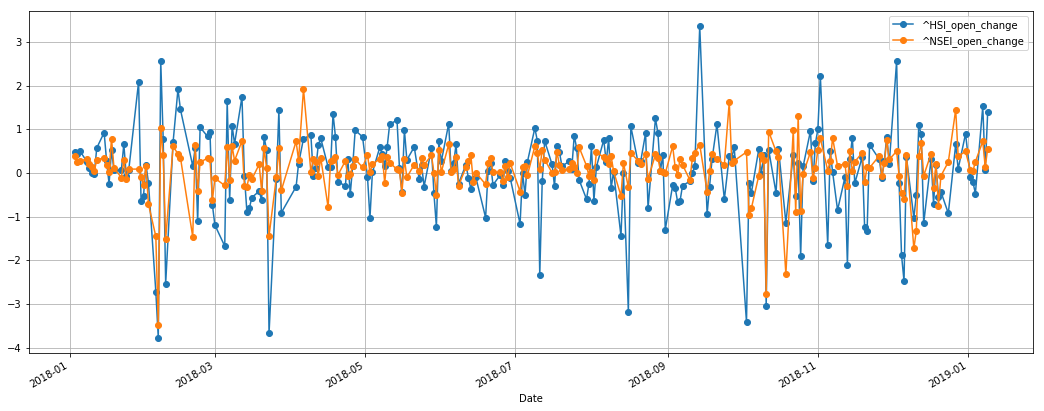

In [107]:
class stock_compare():
    def __init__(self,symbol1,symbol2,start_date,end_date,comp_type):
        from pandas_datareader import data
        import matplotlib.pyplot as plt
        self.symbol1 = symbol1
        self.symbol2 = symbol2
        self.start_date = start_date
        self.end_date = end_date
        self.comp_type = comp_type
        
        
    def close_open_comp(self):
        sym1 = data.DataReader(self.symbol1, 'yahoo', self.start_date, self.end_date).reset_index()
        sym2 = data.DataReader(self.symbol2, 'yahoo', self.start_date,self.end_date).reset_index()
        sym1 = sym1.rename(columns ={'Open':self.symbol1 +'_open','Close':self.symbol1 +'_close'})
        sym2 = sym2.rename(columns ={'Open':self.symbol2 +'_open','Close':self.symbol2 +'_close'})
        sc = sym1[['Date',self.symbol1 +'_open',self.symbol1 +'_close']].merge(sym2[['Date',self.symbol2 +'_open',self.symbol2 +'_close']],on = 'Date').set_index('Date')
        sc[self.symbol1 +'_close_shift'] = sc[self.symbol1 +'_close'].shift()
        sc[self.symbol2 +'_close_shift'] = sc[self.symbol2 +'_close'].shift()
        sc[self.symbol2 +'_open_change'] = ((sc[self.symbol2 +'_open'] - sc[self.symbol2+'_close_shift'])/ sc[self.symbol2+'_close_shift']) * 100
       
        if  self.comp_type == 'CO':
            sc[self.symbol1 +'_cls_change'] = ((sc[self.symbol1 +'_close'] - sc[self.symbol1+'_close_shift']) / sc[self.symbol1+'_close_shift']) * 100
            sc[self.symbol1 +'_direction'] = sc[self.symbol1 +'_cls_change'].apply(self.direction)
        elif self.comp_type == 'OO':
            sc[self.symbol1 +'_open_change'] = ((sc[self.symbol1 +'_open'] - sc[self.symbol1+'_close_shift']) / sc[self.symbol1+'_close_shift']) * 100
            sc[self.symbol1 +'_direction'] = sc[self.symbol1 +'_open_change'].apply(self.direction)
        else:
            assert self.comp_type == 'CO' or self.comp_type == 'OO' , 'can only comapre CO and OO'

        sc[self.symbol2 +'_direction'] = sc[self.symbol2 +'_open_change'].apply(self.direction)
        sc  = sc.dropna(subset=[self.symbol2+'_close_shift'])
        print((sc[self.symbol1 + '_direction'] == sc[self.symbol2 +'_direction']).value_counts(normalize = True)) 
        if  self.comp_type == 'CO':
            return sc[[self.symbol1 +'_cls_change',self.symbol2 + '_open_change']].plot(figsize = (18,7),marker = 'o',grid =True)
        else:
            return sc[[self.symbol1 +'_open_change',self.symbol2 + '_open_change']].plot(figsize = (18,7),marker = 'o',grid =True)


    def direction(self,x):
        if str(x).startswith('-'):
            return 'down'
        else:
            return 'up'
    
stock = stock_compare('^HSI','^NSEI','2018-01-02','2019-01-09','OO')
stock.close_open_comp()

In [3]:
import psycopg2
conn=psycopg2.connect("dbname='postgres' host='192.168.1.100' user='postgres' password='postgres' port='5434'")
cursor = conn.cursor()
cursor.execute("COPY stocks.price_history_candle_5m(datetime,close,high,low,open,volume) FROM '/home/hari/stockcm.csv' DELIMITER ',' CSV HEADER;")
conn.commit()

OperationalError: could not open file "/home/hari/stockcm.csv" for reading: No such file or directory
HINT:  COPY FROM instructs the PostgreSQL server process to read a file. You may want a client-side facility such as psql's \copy.


# The next two are for bulk loading of indices and nifty

In [2]:

def daily_stock_updater():
    from datetime import date
    from nsepy import get_history
    import datetime
    import psycopg2
    import logging
    global hd

    trading_symbols = ['INFRATEL','INDUSINDBK','LT','AUROPHARMA','UPL','LUPIN','HINDALCO','IBULHSGFIN','ZEEL','BOSCHLTD','BAJFINANCE',
    'ADANIPORTS','EICHERMOT','YESBANK','TECHM','HINDPETRO','IOC','COALINDIA','SUNPHARMA','ULTRACEMCO','ASIANPAINT', 'AMBUJACEM', 
    'AXISBANK', 'BAJAJ-AUTO', 'BHARTIARTL', 'BPCL', 'CIPLA', 'DRREDDY', 'GAIL', 'HCLTECH', 'HDFC', 'HDFCBANK', 'HEROMOTOCO', 
    'HINDUNILVR', 'ICICIBANK', 'INFY', 'ITC', 'KOTAKBANK', 'M&M', 'MARUTI', 'NTPC', 'ONGC', 'POWERGRID','RELIANCE', 'SBIN', 'VEDL', 
    'TATAMOTORS', 'TATASTEEL', 'TCS', 'WIPRO']

    try:
        conn=psycopg2.connect("dbname='postgres' host='192.168.1.100' user='postgres' password='postgres' port='5434'")
    except:
        logging.warning("Unable to connect to the database.")
    print('stage1')
    cursor = conn.cursor()
    for i in trading_symbols:
        hd = get_history(symbol= i,
                           start=date(2019,2,15),
                           end=date(2019,2,22))
        hd = hd.reset_index()
        hd.Date = hd.Date.astype('str')
        hd  = hd[['Date', 'High', 'Low', 'Open', 'Close', 'Symbol','Volume']]
        hd = hd.values
        print('stage 2')
        
        for j in hd:
            query = "insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$"+str(j[0])+"$$,$$" + str(j[1])+"$$,$$" \
            + str(j[2])+"$$,$$"+ str(j[3])+"$$,$$"+ str(j[4])+"$$,$$"+ str(j[5])+"$$,$$"+ str(j[6])+"$$)"
            print(query)
            cursor.execute(query)
            conn.commit()

    if(conn):
        conn.close()
        logging.warning("PostgreSQL connection is closed")    
        
daily_stock_updater()

stage1
stage 2
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-15$$,$$310.45$$,$$291.95$$,$$299.2$$,$$306.9$$,$$INFRATEL$$,$$4992264$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-18$$,$$319.25$$,$$304.7$$,$$306.7$$,$$317.05$$,$$INFRATEL$$,$$6443621$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-19$$,$$324.85$$,$$315.0$$,$$315.0$$,$$318.45$$,$$INFRATEL$$,$$6184870$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-20$$,$$322.9$$,$$313.65$$,$$319.0$$,$$318.2$$,$$INFRATEL$$,$$2478600$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-21$$,$$318.0$$,$$306.3$$,$$317.6$$,$$312.55$$,$$INFRATEL$$,$$3996262$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-22$$,$$321.8$$,$$309.0

stage 2
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-15$$,$$441.0$$,$$421.1$$,$$440.2$$,$$431.35$$,$$ZEEL$$,$$9519734$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-18$$,$$441.65$$,$$424.0$$,$$429.9$$,$$438.95$$,$$ZEEL$$,$$6340575$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-19$$,$$451.0$$,$$433.0$$,$$440.0$$,$$446.45$$,$$ZEEL$$,$$7740843$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-20$$,$$451.0$$,$$438.4$$,$$447.0$$,$$445.05$$,$$ZEEL$$,$$5484272$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-21$$,$$454.9$$,$$440.0$$,$$444.0$$,$$446.5$$,$$ZEEL$$,$$5404437$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-22$$,$$450.8$$,$$441.25$$,$$443.75$$,$$448.25$$,$$ZE

stage 2
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-15$$,$$127.0$$,$$120.95$$,$$126.95$$,$$125.45$$,$$IOC$$,$$16601313$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-18$$,$$126.75$$,$$124.2$$,$$125.85$$,$$124.95$$,$$IOC$$,$$5920366$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-19$$,$$128.15$$,$$125.0$$,$$125.0$$,$$125.6$$,$$IOC$$,$$6131943$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-20$$,$$130.7$$,$$125.9$$,$$126.5$$,$$129.3$$,$$IOC$$,$$7962818$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-21$$,$$131.45$$,$$128.3$$,$$129.0$$,$$131.1$$,$$IOC$$,$$5912967$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-22$$,$$138.0$$,$$131.7$$,$$131.75$$,$$137.2$$,$$IOC$$

stage 2
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-15$$,$$306.05$$,$$297.35$$,$$301.0$$,$$304.6$$,$$BHARTIARTL$$,$$6063171$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-18$$,$$307.15$$,$$300.05$$,$$306.9$$,$$302.55$$,$$BHARTIARTL$$,$$4001810$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-19$$,$$313.5$$,$$301.55$$,$$303.9$$,$$303.7$$,$$BHARTIARTL$$,$$6844127$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-20$$,$$310.85$$,$$304.95$$,$$305.55$$,$$309.0$$,$$BHARTIARTL$$,$$5603086$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-21$$,$$311.0$$,$$303.0$$,$$305.9$$,$$309.9$$,$$BHARTIARTL$$,$$5232493$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-22$$,$$316.5$$,$$3

stage 2
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-15$$,$$2785.4$$,$$2678.0$$,$$2785.4$$,$$2696.45$$,$$HEROMOTOCO$$,$$700634$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-18$$,$$2704.9$$,$$2660.45$$,$$2690.0$$,$$2683.55$$,$$HEROMOTOCO$$,$$433854$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-19$$,$$2713.2$$,$$2628.9$$,$$2687.0$$,$$2636.85$$,$$HEROMOTOCO$$,$$684524$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-20$$,$$2661.75$$,$$2606.6$$,$$2646.05$$,$$2623.75$$,$$HEROMOTOCO$$,$$605830$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-21$$,$$2657.0$$,$$2581.5$$,$$2632.0$$,$$2641.25$$,$$HEROMOTOCO$$,$$736959$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-22$$

stage 2
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-15$$,$$137.4$$,$$132.0$$,$$132.0$$,$$136.25$$,$$NTPC$$,$$21546525$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-18$$,$$140.4$$,$$134.95$$,$$135.8$$,$$137.45$$,$$NTPC$$,$$10834305$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-19$$,$$137.9$$,$$132.45$$,$$137.1$$,$$133.7$$,$$NTPC$$,$$7524246$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-20$$,$$138.9$$,$$132.3$$,$$134.2$$,$$137.2$$,$$NTPC$$,$$12462775$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-21$$,$$138.5$$,$$135.5$$,$$137.8$$,$$136.45$$,$$NTPC$$,$$3932612$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-22$$,$$140.25$$,$$135.0$$,$$136.75$$,$$139.7$$,$$

stage 2
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-15$$,$$2052.0$$,$$2010.95$$,$$2049.0$$,$$2029.7$$,$$TCS$$,$$1930065$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-18$$,$$2041.95$$,$$1962.65$$,$$2037.6$$,$$1970.3$$,$$TCS$$,$$2942184$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-19$$,$$1971.0$$,$$1892.0$$,$$1970.0$$,$$1904.8$$,$$TCS$$,$$4408554$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-20$$,$$1933.8$$,$$1881.3$$,$$1915.0$$,$$1914.75$$,$$TCS$$,$$4645778$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-21$$,$$1940.0$$,$$1897.05$$,$$1914.75$$,$$1914.2$$,$$TCS$$,$$4683919$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-22$$,$$1930.0$$,$$1905.1$$,$$1917.2$

stage 2
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-15$$,$$377.35$$,$$370.15$$,$$375.25$$,$$376.1$$,$$WIPRO$$,$$3522673$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-18$$,$$378.8$$,$$370.75$$,$$378.8$$,$$375.6$$,$$WIPRO$$,$$3480075$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-19$$,$$375.4$$,$$362.2$$,$$372.55$$,$$363.45$$,$$WIPRO$$,$$3064358$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-20$$,$$374.0$$,$$361.2$$,$$363.2$$,$$372.2$$,$$WIPRO$$,$$4410484$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-21$$,$$376.8$$,$$370.8$$,$$372.8$$,$$374.55$$,$$WIPRO$$,$$2573085$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-02-22$$,$$380.0$$,$$373.5$$,$$375.0$$,$$378.75$$

In [15]:
from datetime import date
from nsepy import get_history
import datetime
date1 = datetime.datetime.now().date() - datetime.timedelta(1)
print(date1)
trading_symbols = ['INFRATEL','INDUSINDBK','LT','AUROPHARMA','UPL','LUPIN','HINDALCO','IBULHSGFIN','ZEEL','BOSCHLTD','BAJFINANCE',
    'ADANIPORTS','EICHERMOT','YESBANK','TECHM','HINDPETRO','IOC','COALINDIA','SUNPHARMA','ULTRACEMCO','ASIANPAINT', 'AMBUJACEM', 
    'AXISBANK', 'BAJAJ-AUTO', 'BHARTIARTL', 'BPCL', 'CIPLA', 'DRREDDY', 'GAIL', 'HCLTECH', 'HDFC', 'HDFCBANK', 'HEROMOTOCO', 
    'HINDUNILVR', 'ICICIBANK', 'INFY', 'ITC', 'KOTAKBANK', 'M&M', 'MARUTI', 'NTPC', 'ONGC', 'POWERGRID','RELIANCE', 'SBIN', 'VEDL', 
    'TATAMOTORS', 'TATASTEEL', 'TCS', 'WIPRO']
counter = 0
for i in trading_symbols:
    hd = get_history(symbol= i,
                               start=date1,
                               end=date1)
    if hd.shape[0] > 0:
        counter += 1
        

2019-03-04


In [16]:
counter

0

In [3]:

def daily_indices_updater():
    from pandas_datareader import data
    import pandas as pd
    import datetime
    import psycopg2
    import logging
    symbols = {'^NYA':'NYSE','^NSEI':'NIFTY','^IXIC':'NASDAQ','^N225':'NIKKEI','^HSI':'HANGSENG','^BSESN':'SENSEX'}
    try:
        conn=psycopg2.connect("dbname='postgres' host='192.168.1.100' user='postgres' password='postgres' port='5434'")
    except:
        logging.warning("Unable to connect to the database.")
    print('stage1')

    cursor = conn.cursor()
    result= pd.DataFrame()
    for i in symbols:
        hd = data.DataReader(i, 'yahoo', '2019-01-26','2019-02-27').drop(['Volume','Adj Close'],axis = 1).reset_index()
        hd['index_code'] = symbols[i]
        hd.Date = hd.Date.astype('str')
        hd = hd.values
        print('stage 2')
        
        for j in hd:
            query = "insert into stocks.index_daily_ohlc(doq,high,low,open,close,index_code) values($$"+str(j[0])+"$$,$$" + str(j[1])+"$$,$$" \
            + str(j[2])+"$$,$$"+ str(j[3])+"$$,$$"+ str(j[4])+"$$,$$"+ str(j[5])+"$$)"
            print(query)
            cursor.execute(query)
            conn.commit()
        #print(query)
    if(conn):
        conn.close()
        logging.warning("PostgreSQL connection is closed")
daily_indices_updater()

stage1
stage 2
insert into stocks.index_history(date,high,low,open,close,index_code) values($$2019-01-25$$,$$12164.48046875$$,$$12105.9599609375$$,$$12106.3896484375$$,$$12127.25$$,$$NYSE$$)
insert into stocks.index_history(date,high,low,open,close,index_code) values($$2019-01-28$$,$$12066.580078125$$,$$11984.8603515625$$,$$12040.66015625$$,$$12065.1103515625$$,$$NYSE$$)
insert into stocks.index_history(date,high,low,open,close,index_code) values($$2019-01-29$$,$$12115.5302734375$$,$$12056.419921875$$,$$12080.419921875$$,$$12090.7802734375$$,$$NYSE$$)
insert into stocks.index_history(date,high,low,open,close,index_code) values($$2019-01-30$$,$$12266.5498046875$$,$$12104.2197265625$$,$$12130.009765625$$,$$12222.3896484375$$,$$NYSE$$)
insert into stocks.index_history(date,high,low,open,close,index_code) values($$2019-01-31$$,$$12315.1396484375$$,$$12196.1904296875$$,$$12222.990234375$$,$$12299.0302734375$$,$$NYSE$$)
insert into stocks.index_history(date,high,low,open,close,index_code) va

stage 2
insert into stocks.index_history(date,high,low,open,close,index_code) values($$2019-01-25$$,$$7174.56005859375$$,$$7111.08984375$$,$$7128.18017578125$$,$$7164.85986328125$$,$$NASDAQ$$)
insert into stocks.index_history(date,high,low,open,close,index_code) values($$2019-01-28$$,$$7086.2998046875$$,$$7034.25$$,$$7075.009765625$$,$$7085.68017578125$$,$$NASDAQ$$)
insert into stocks.index_history(date,high,low,open,close,index_code) values($$2019-01-29$$,$$7092.2900390625$$,$$7011.47021484375$$,$$7087.490234375$$,$$7028.2900390625$$,$$NASDAQ$$)
insert into stocks.index_history(date,high,low,open,close,index_code) values($$2019-01-30$$,$$7201.31005859375$$,$$7065.56982421875$$,$$7094.7900390625$$,$$7183.080078125$$,$$NASDAQ$$)
insert into stocks.index_history(date,high,low,open,close,index_code) values($$2019-01-31$$,$$7303.1201171875$$,$$7205.9501953125$$,$$7208.169921875$$,$$7281.740234375$$,$$NASDAQ$$)
insert into stocks.index_history(date,high,low,open,close,index_code) values($$2

stage 2
insert into stocks.index_history(date,high,low,open,close,index_code) values($$2019-01-28$$,$$36124.26171875$$,$$35565.1484375$$,$$36099.62109375$$,$$35656.69921875$$,$$SENSEX$$)
insert into stocks.index_history(date,high,low,open,close,index_code) values($$2019-01-29$$,$$35734.140625$$,$$35375.51171875$$,$$35716.71875$$,$$35592.5$$,$$SENSEX$$)
insert into stocks.index_history(date,high,low,open,close,index_code) values($$2019-01-30$$,$$35850.41015625$$,$$35490.96875$$,$$35819.671875$$,$$35591.25$$,$$SENSEX$$)
insert into stocks.index_history(date,high,low,open,close,index_code) values($$2019-01-31$$,$$36278.12890625$$,$$35740.0703125$$,$$35805.51171875$$,$$36256.69140625$$,$$SENSEX$$)
insert into stocks.index_history(date,high,low,open,close,index_code) values($$2019-02-01$$,$$36778.140625$$,$$36221.3203125$$,$$36311.73828125$$,$$36469.4296875$$,$$SENSEX$$)
insert into stocks.index_history(date,high,low,open,close,index_code) values($$2019-02-04$$,$$36622.76953125$$,$$36225.48

In [6]:
from pandas_datareader import data
import pandas as pd
from datetime import date
import datetime
import psycopg2
import logging
import time

def main():
    # conn = []

    # try:
    #     conn=psycopg2.connect("dbname='postgres' host='192.168.1.100' user='postgres' password='postgres' port='5434'")
    #     cursor = conn.cursor()
    
    # except:
    #     logging.warning("Unable to connect to the database.")
    # print('stock update is running')

    # if conn:
        date1 = datetime.datetime.now().date() - datetime.timedelta(1)
        print(date1)
        if date1.isoweekday() in range(1,6):
            date2 = str(datetime.datetime.now().date() - datetime.timedelta(1))
            symbols = {'^NYA':'NYSE','^NSEI':'NIFTY','^IXIC':'NASDAQ','^N225':'NIKKEI','^HSI':'HANGSENG','^BSESN':'SENSEX'}
            for i in symbols:
                hd = data.DataReader(i, 'yahoo', date2, date2).drop(['Volume','Adj Close'],axis = 1).reset_index()
                hd['index_code'] = symbols[i]
                #print(hd.columns)
                #print(hd)
                hd = hd.rename(columns={'Date':'doq'})
                hd = hd[hd['doq'] == date2]
                hd.doq = hd.doq.astype('str')
                hd = hd.values
                query = "insert into stocks.index_daily_ohlc(doq,high,low,open,close,index_code) values($$"+str(hd[0][0])+"$$,$$" + str(hd[0][1])+"$$,$$" \
                + str(hd[0][2])+"$$,$$"+ str(hd[0][3])+"$$,$$"+ str(hd[0][4])+"$$,$$"+ str(hd[0][5])+"$$)"
                print(query)
            #     cursor.execute(query)
            #     conn.commit()
            # if(conn):
            #     conn.close()
            #     logging.warning("PostgreSQL connection is closed")
            # return "sucessfully done stock update"
main()



2019-03-12
insert into stocks.index_daily_ohlc(doq,high,low,open,close,index_code) values($$2019-03-12$$,$$12611.4697265625$$,$$12571.0400390625$$,$$12576.759765625$$,$$12582.8095703125$$,$$NYSE$$)
insert into stocks.index_daily_ohlc(doq,high,low,open,close,index_code) values($$2019-03-12$$,$$11320.400390625$$,$$11227.0$$,$$11231.349609375$$,$$11301.2001953125$$,$$NIFTY$$)
insert into stocks.index_daily_ohlc(doq,high,low,open,close,index_code) values($$2019-03-12$$,$$7611.1298828125$$,$$7560.4599609375$$,$$7571.85009765625$$,$$7591.02978515625$$,$$NASDAQ$$)
insert into stocks.index_daily_ohlc(doq,high,low,open,close,index_code) values($$2019-03-12$$,$$21568.48046875$$,$$21348.810546875$$,$$21361.609375$$,$$21503.689453125$$,$$NIKKEI$$)
insert into stocks.index_daily_ohlc(doq,high,low,open,close,index_code) values($$2019-03-12$$,$$28920.869140625$$,$$28920.869140625$$,$$28920.869140625$$,$$28920.869140625$$,$$HANGSENG$$)
insert into stocks.index_daily_ohlc(doq,high,low,open,close,index_

In [44]:
import crython
@crython.job(expr='0 46 16 * * 1-5 *')
def job():
    print("this is hari")


In [21]:
import schedule
import time
def job1():
    print("this is hari")

schedule.every().day.at("14:13").do(job1)
while True:
    schedule.run_pending()
    time.sleep(1)

this is hari
this is hari
this is hari
this is hari
this is hari
this is hari
this is hari
this is hari
this is hari
this is hari
this is hari
this is hari
this is hari
this is hari
this is hari


KeyboardInterrupt: 

In [ ]:
import subprocess
subprocess.call(["ls", "-l"])

In [ ]:
@crython.job(expr='0 30 8 * * 1-5 *')


In [25]:
for j in hd:
    print(j[0])

2019-01-31
2019-02-01
2019-02-04
2019-02-05
2019-02-06
2019-02-07
2019-02-08
2019-02-11
2019-02-12


In [11]:
import datetime
date1 = datetime.datetime.now().date() - datetime.timedelta(1)

date1.isoweekday()

3

In [5]:
def daily_stock_updater():
    from datetime import date
    from nsepy import get_history
    import datetime
    import psycopg2
    import logging

    trading_symbols = ['INFRATEL','INDUSINDBK','LT','AUROPHARMA','UPL','LUPIN','HINDALCO','IBULHSGFIN','ZEEL','BOSCHLTD','BAJFINANCE',
    'ADANIPORTS','EICHERMOT','YESBANK','TECHM','HINDPETRO','IOC','COALINDIA','SUNPHARMA','ULTRACEMCO','ASIANPAINT', 'AMBUJACEM', 
    'AXISBANK', 'BAJAJ-AUTO', 'BHARTIARTL', 'BPCL', 'CIPLA', 'DRREDDY', 'GAIL', 'HCLTECH', 'HDFC', 'HDFCBANK', 'HEROMOTOCO', 
    'HINDUNILVR', 'ICICIBANK', 'INFY', 'ITC', 'KOTAKBANK', 'M&M', 'MARUTI', 'NTPC', 'ONGC', 'POWERGRID','RELIANCE', 'SBIN', 'VEDL', 
    'TATAMOTORS', 'TATASTEEL', 'TCS', 'WIPRO']

    try:
        conn=psycopg2.connect("dbname='postgres' host='localhost' user='postgres' password='postgres' port='5434'")
        cursor = conn.cursor()
    except:
        logging.warning("Unable to connect to the database.")

    
    date1 = datetime.datetime.now().date() - datetime.timedelta(3)
    print(date1)
    if date1.isoweekday() in range(1,6):
        for i in trading_symbols:
            hd = get_history(symbol= i,
                               start=date1,
                               end=date1)
            hd = hd.reset_index()
            hd = hd[hd['Date'] == date1]
            hd.Date = hd.Date.astype('str')
            hd  = hd[['Date', 'High', 'Low', 'Open', 'Close', 'Symbol','Volume']]
            hd = hd.values
            query = "insert into  stocks.stock_price_history_ohlc(doq,high,low,open,close,code,volume) values($$"+str(hd[0][0])+"$$,$$" + str(hd[0][1])+"$$,$$" \
            + str(hd[0][2])+"$$,$$"+ str(hd[0][3])+"$$,$$"+ str(hd[0][4])+"$$,$$"+ str(hd[0][5])+"$$,$$"+ str(hd[0][6])+"$$)"
            print(query)
            #cursor.execute(query)
            #conn.commit()
    if(conn):
        conn.close()
        logging.warning("PostgreSQL connection is closed")
daily_stock_updater()

2019-03-15
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-03-15$$,$$320.0$$,$$311.25$$,$$316.0$$,$$313.2$$,$$INFRATEL$$,$$2880482$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-03-15$$,$$1718.0$$,$$1685.1$$,$$1686.0$$,$$1703.25$$,$$INDUSINDBK$$,$$3884063$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-03-15$$,$$1410.8$$,$$1378.6$$,$$1386.0$$,$$1396.5$$,$$LT$$,$$5723980$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-03-15$$,$$785.0$$,$$768.4$$,$$782.0$$,$$771.6$$,$$AUROPHARMA$$,$$1860397$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-03-15$$,$$928.4$$,$$902.4$$,$$904.0$$,$$923.45$$,$$UPL$$,$$2609765$$)
insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-03-15$$,$$789.6$$,$$767.0$$,$$767

insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-03-15$$,$$2068.95$$,$$1991.0$$,$$1998.9$$,$$2039.95$$,$$TCS$$,$$5184318$$)


insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$2019-03-15$$,$$264.25$$,$$257.2$$,$$258.0$$,$$263.45$$,$$WIPRO$$,$$8720097$$)


In [13]:
import schedule
def job
schedule.every

In [8]:
def daily_indices_updater():
    from pandas_datareader import data
    import pandas as pd
    import datetime
    import psycopg2
    import logging
    symbols = {'^NYA':'NYSE','^NSEI':'NIFTY','^IXIC':'NASDAQ','^N225':'NIKKEI','^HSI':'HANGSENG','^BSESN':'SENSEX'}
    # try:
    #     conn=psycopg2.connect("dbname='postgres' host='192.168.1.100' user='postgres' password='postgres' port='5434'")
    # except:
    #     logging.warning("Unable to connect to the database.")
    print('stage1')

    #cursor = conn.cursor()
    result= pd.DataFrame()
    for i in symbols:
        hd = data.DataReader(i, 'yahoo', '2019-02-28','2019-03-13').drop(['Volume','Adj Close'],axis = 1).reset_index()
        hd['index_code'] = symbols[i]
        hd.Date = hd.Date.astype('str')
        hd = hd.values
        print('stage 2')
        
        for j in hd:
            query = "insert into stocks.index_daily_ohlc(doq,high,low,open,close,index_code) values($$"+str(j[0])+"$$,$$" + str(j[1])+"$$,$$" \
            + str(j[2])+"$$,$$"+ str(j[3])+"$$,$$"+ str(j[4])+"$$,$$"+ str(j[5])+"$$)"
            print(query)
            #cursor.execute(query)
            #conn.commit()
        #print(query)
    # if(conn):
    #     conn.close()
    #     logging.warning("PostgreSQL connection is closed")
daily_indices_updater()

stage1
stage 2
insert into stocks.index_daily_ohlc(doq,high,low,open,close,index_code) values($$2019-02-27$$,$$12706.1298828125$$,$$12637.849609375$$,$$12680.919921875$$,$$12689.8701171875$$,$$NYSE$$)
insert into stocks.index_daily_ohlc(doq,high,low,open,close,index_code) values($$2019-02-28$$,$$12679.1904296875$$,$$12642.4296875$$,$$12671.23046875$$,$$12644.8095703125$$,$$NYSE$$)
insert into stocks.index_daily_ohlc(doq,high,low,open,close,index_code) values($$2019-03-01$$,$$12740.400390625$$,$$12645.5703125$$,$$12698.23046875$$,$$12700.669921875$$,$$NYSE$$)
insert into stocks.index_daily_ohlc(doq,high,low,open,close,index_code) values($$2019-03-04$$,$$12737.5$$,$$12537.7998046875$$,$$12728.9599609375$$,$$12637.26953125$$,$$NYSE$$)
insert into stocks.index_daily_ohlc(doq,high,low,open,close,index_code) values($$2019-03-05$$,$$12649.76953125$$,$$12600.8896484375$$,$$12638.1904296875$$,$$12624.4697265625$$,$$NYSE$$)
insert into stocks.index_daily_ohlc(doq,high,low,open,close,index_code) 

stage 2
insert into stocks.index_daily_ohlc(doq,high,low,open,close,index_code) values($$2019-02-28$$,$$36085.8515625$$,$$35829.1484375$$,$$36025.71875$$,$$35867.44140625$$,$$SENSEX$$)
insert into stocks.index_daily_ohlc(doq,high,low,open,close,index_code) values($$2019-03-01$$,$$36140.671875$$,$$35952.41015625$$,$$36018.48828125$$,$$36063.80859375$$,$$SENSEX$$)
insert into stocks.index_daily_ohlc(doq,high,low,open,close,index_code) values($$2019-03-05$$,$$36457.44140625$$,$$35926.94140625$$,$$36141.0703125$$,$$36442.5390625$$,$$SENSEX$$)
insert into stocks.index_daily_ohlc(doq,high,low,open,close,index_code) values($$2019-03-06$$,$$36666.46875$$,$$36456.8203125$$,$$36544.859375$$,$$36636.1015625$$,$$SENSEX$$)
insert into stocks.index_daily_ohlc(doq,high,low,open,close,index_code) values($$2019-03-07$$,$$36830.25$$,$$36590.87890625$$,$$36744.01953125$$,$$36725.421875$$,$$SENSEX$$)
insert into stocks.index_daily_ohlc(doq,high,low,open,close,index_code) values($$2019-03-08$$,$$36753.5898

In [1]:
from pandas_datareader import data
data.DataReader('^HSI', 'yahoo', '2019-02-20', '2019-02-25').drop(['Volume','Adj Close'],axis = 1).reset_index().columns

Index(['Date', 'High', 'Low', 'Open', 'Close'], dtype='object')

In [ ]:
from pandas_datareader import data
import pandas as pd
from datetime import date
from nsepy import get_history
import datetime
import psycopg2
import logging
import time
import requests
import bs4

def main():
    trading_symbols = ['INFRATEL','INDUSINDBK','LT','AUROPHARMA','UPL','LUPIN','HINDALCO','IBULHSGFIN','ZEEL','BOSCHLTD','BAJFINANCE',
    'ADANIPORTS','EICHERMOT','YESBANK','TECHM','HINDPETRO','IOC','COALINDIA','SUNPHARMA','ULTRACEMCO','ASIANPAINT', 'AMBUJACEM', 
    'AXISBANK', 'BAJAJ-AUTO', 'BHARTIARTL', 'BPCL', 'CIPLA', 'DRREDDY', 'GAIL', 'HCLTECH', 'HDFC', 'HDFCBANK', 'HEROMOTOCO', 
    'HINDUNILVR', 'ICICIBANK', 'INFY', 'ITC', 'KOTAKBANK', 'M&M', 'MARUTI', 'NTPC', 'ONGC', 'POWERGRID','RELIANCE', 'SBIN', 'VEDL', 
    'TATAMOTORS', 'TATASTEEL', 'TCS', 'WIPRO']
    conn = []

    try:
        conn=psycopg2.connect("dbname='postgres' host='db' user='postgres' password='postgres' port='5433'")
        cursor = conn.cursor()
    except:
        logging.warning("Unable to connect to the database.")
    print('stock update is running')
    if conn:
        date1 = datetime.datetime.now().date() - datetime.timedelta(1)
        if date1.isoweekday() in range(1,6):
            for i in trading_symbols:
                hd = get_history(symbol= i,
                                   start=date1,
                                   end=date1)
                hd = hd.reset_index()
                hd = hd[hd['Date'] == date1]
                hd.Date = hd.Date.astype('str')
                hd  = hd[['Date', 'High', 'Low', 'Open', 'Close', 'Symbol','Volume']]
                hd = hd.values
                query = "insert into  stocks.stock_price_history_ohlc(date,high,low,open,close,code,volume) values($$"+str(hd[0][0])+"$$,$$" + str(hd[0][1])+"$$,$$" \
                + str(hd[0][2])+"$$,$$"+ str(hd[0][3])+"$$,$$"+ str(hd[0][4])+"$$,$$"+ str(hd[0][5])+"$$,$$"+ str(hd[0][6])+"$$)"
                print(query)
                cursor.execute(query)
                conn.commit()
                
            date2 = str(datetime.datetime.now().date() - datetime.timedelta(1))
            symbols = {'^NYA':'NYSE','^NSEI':'NIFTY','^IXIC':'NASDAQ','^N225':'NIKKEI','^HSI':'HANGSENG','^BSESN':'SENSEX'}
            for i in symbols:
                hd = data.DataReader(i, 'yahoo', date2, date2).drop(['Volume','Adj Close'],axis = 1).reset_index()
                hd['index_code'] = symbols[i]
                hd = hd[hd['Date'] == date2]
                hd.Date = hd.Date.astype('str')
                hd = hd.values
                query = "insert into stocks.index_history(date,high,low,open,close,index_code) values($$"+str(hd[0][0])+"$$,$$" + str(hd[0][1])+"$$,$$" \
                + str(hd[0][2])+"$$,$$"+ str(hd[0][3])+"$$,$$"+ str(hd[0][4])+"$$,$$"+ str(hd[0][5])+"$$)"
                print(query)
                cursor.execute(query)
                conn.commit()
            #usd_to_inr
            
            yahoo_path = "https://in.finance.yahoo.com/"
            res = requests.get(yahoo_path)
            soup = bs4.BeautifulSoup(res.text,'html.parser')
            stock_var1 = []

            for i in soup.find_all('span',attrs={"class":"Trsdu(0.3s) Fz(s) Mb(0px) D(b)"}):
                stock_var1.append(i.text)
            #gold,silver
            
            historical_gs = {}
            for comm in ['gold','silver']:
                gs = []
                path = "https://www.bullion-rates.com/{}/INR/{}-{}-history.htm".format(comm,date1.year,date1.month)
                print(path)
                res = requests.get(path)
                soup = bs4.BeautifulSoup(res.text,'html.parser')


                for i in soup.find_all('tr',attrs={"class":"DataRow"}):
                    lis_1 = []
                    for j in i.find_all('td',attrs={'class':'rate'}):
                        lis_1.append(j.text)
                    gs.append(lis_1)
                historical_gs[comm] =gs
            gold = historical_gs['gold'][-1]
            silver = historical_gs['silver'][-1]
            silver[0] = str(date(int('20' + str(silver[0].split('-')[2])),int(silver[0].split('-')[1].replace('0','')),int(silver[0].split('-')[0].replace('0',''))))
            gold[0] = str(date(int('20' + str(gold[0].split('-')[2])),int(gold[0].split('-')[1].replace('0','')),int(gold[0].split('-')[0].replace('0',''))))
            print(gold,silver)

            if(conn):
                conn.close()
                logging.warning("PostgreSQL connection is closed")
            return "sucessfully done stock update"
main()

In [38]:
import requests
import re
import bs4
from urllib.request import Request, urlopen
import pandas as pd

df_max = pd.read_sql("select max(doq) from stocks.index_daily_ohlc where index_code = 'CRUDE'",conn)
max_date = df_max[['max']].values[0][0]

yahoo_path = {"USDINR":"https://in.investing.com/currencies/usd-inr-historical-data","CRUDE":"https://in.investing.com/commodities/crude-oil-historical-data"}

for path in yahoo_path:
    
    req = Request(yahoo_path[path], headers={'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36'})
    res = urlopen(req).read()
    soup = bs4.BeautifulSoup(res,'html.parser')
    stock_var1 = []
    counter = 0

    for i in soup.find_all('table',attrs={"class":"genTbl closedTbl historicalTbl"}):

        for j in i.find_all('tbody'):
            #print(j)
            for m in j.find_all('tr'):
                data1 = []
                for k in m.find_all('td'):
                    data1.append(k.text)
                stock_var1.append(data1)
    #print(stock_var1[:5])
    df = pd.DataFrame(stock_var1)
    #print(df.head())
    df[0] = pd.to_datetime(df[0])
    df[0] = df[0].astype('str')
    df = df.iloc[:,:5]
    df = df[df[0]>max_date]
    print(df)
    df['index'] = path
    #print(df.values)
    
    for j in df:
            query = "insert into stocks.index_daily_ohlc(doq,close,open,high,low,index_code) values($$"+str(j[0])+"$$,$$" + str(j[1])+"$$,$$" \
            + str(j[2])+"$$,$$" + str(j[3])+"$$,$$"+ str(j[4])+"$$)"
            print(query)
            cursor.execute(query)
            conn.commit()
            row_count += 1


[['2019-03-25' '68.910' '69.171' '69.214' '68.795' 'USDINR']
 ['2019-03-24' '69.171' '69.171' '69.171' '69.171' 'USDINR']
 ['2019-03-22' '69.170' '68.650' '69.170' '68.540' 'USDINR']
 ['2019-03-21' '68.810' '68.565' '68.810' '68.510' 'USDINR']
 ['2019-03-20' '68.790' '69.027' '69.176' '68.731' 'USDINR']
 ['2019-03-19' '69.015' '68.619' '69.067' '68.350' 'USDINR']
 ['2019-03-18' '68.625' '68.959' '68.959' '68.431' 'USDINR']
 ['2019-03-17' '68.963' '68.963' '68.963' '68.963' 'USDINR']
 ['2019-03-15' '68.963' '69.357' '69.372' '68.935' 'USDINR']
 ['2019-03-14' '69.365' '69.525' '69.755' '69.255' 'USDINR']
 ['2019-03-13' '69.529' '69.607' '69.794' '69.419' 'USDINR']
 ['2019-03-12' '69.625' '69.821' '69.821' '69.491' 'USDINR']
 ['2019-03-11' '69.850' '70.028' '70.041' '69.808' 'USDINR']
 ['2019-03-10' '69.997' '70.011' '70.011' '69.997' 'USDINR']
 ['2019-03-08' '70.011' '70.111' '70.246' '69.826' 'USDINR']
 ['2019-03-07' '70.116' '70.151' '70.152' '69.950' 'USDINR']
 ['2019-03-06' '70.080' 

In [8]:
import requests
import re
import bs4
from urllib.request import Request, urlopen
yahoo_path = "https://in.investing.com/commodities/crude-oil-historical-data"
req = Request(yahoo_path, headers={'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36'})
res = urlopen(req).read()
soup = bs4.BeautifulSoup(res,'html.parser')
#print(soup.prettify())
stock_var2 = []
counter = 0

for i in soup.find_all('table',attrs={"class":"genTbl closedTbl historicalTbl"}):
    #print(i)
    
    for j in i.find_all('tbody'):
        #print(j)
        for m in j.find_all('tr'):
            data = []
            for k in m.find_all('td'):
                data.append(k.text)
            stock_var2.append(data)
print(stock_var1)
print(stock_var2)

[['Mar 25, 2019', '58.67', '58.81', '58.83', '58.34', '-', '-0.26%'], ['Mar 24, 2019', '58.82', '58.98', '59.15', '58.75', '-', '-0.37%'], ['Mar 22, 2019', '59.04', '59.87', '60.07', '58.28', '738.84K', '-1.57%'], ['Mar 21, 2019', '59.98', '59.99', '60.39', '59.66', '655.38K', '0.25%'], ['Mar 20, 2019', '59.83', '59.02', '60.12', '58.39', '31.13K', '1.36%'], ['Mar 19, 2019', '59.03', '59.01', '59.57', '58.62', '114.82K', '-0.10%'], ['Mar 18, 2019', '59.09', '58.45', '59.23', '58.05', '157.24K', '0.97%'], ['Mar 15, 2019', '58.52', '58.51', '58.95', '57.74', '507.39K', '-0.15%'], ['Mar 14, 2019', '58.61', '58.35', '58.74', '58.00', '567.60K', '0.60%'], ['Mar 13, 2019', '58.26', '57.09', '58.48', '57.01', '610.62K', '2.44%'], ['Mar 12, 2019', '56.87', '56.76', '57.55', '56.74', '652.80K', '0.14%'], ['Mar 11, 2019', '56.79', '56.07', '57.01', '55.96', '597.16K', '1.28%'], ['Mar 08, 2019', '56.07', '56.43', '56.51', '54.52', '747.36K', '-1.04%'], ['Mar 07, 2019', '56.66', '56.20', '56.99', 

In [5]:

import bs4
from urllib.request import Request, urlopen
yahoo_path = "https://in.investing.com/currencies/usd-inr-historical-data"
req = Request(yahoo_path, headers={'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36'})
res = urlopen(req).read()
soup = bs4.BeautifulSoup(res,'html.parser')
for i in soup.find_all('div',attrs={"class":"ui-datepicker-group ui-datepicker-group-first"}):
    print(i)
    for j in i.find_all('input',attrs={"class":"newInput"}):
        print(j)

# soup.find('form', id='form_product_page')
# form = soup.find('form', id='form_product_page')
# response = requests.post(url, data=data, headers=headers)
# doc = BeautifulSoup(response.text, 'html.parser')

In [6]:
soup.prettify()

'<!DOCTYPE HTML>\n<html class="com" dir="ltr" geo="IN" lang="en-in" xml:lang="en-in" xmlns="http://www.w3.org/1999/xhtml" xmlns:schema="http://schema.org/">\n <head>\n  <script>\n   (function(i,s,o,g,r,a,m){i[\'GoogleAnalyticsObject\']=r;i[r]=i[r]||function(){\n            (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),\n            m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)\n        })(window,document,\'script\',\'//www.google-analytics.com/analytics.js\',\'ga\');\n  </script>\n  <link href="https://i-invdn-com.akamaized.net" rel="dns-prefetch"/>\n  <link href="https://a-invdn-com.akamaized.net" rel="dns-prefetch"/>\n  <title>\n   USD INR Historical Data - Investing.com India\n  </title>\n  <link href="https://www.investing.com/currencies/usd-inr-historical-data" hreflang="x-default" rel="alternate"/>\n  <link href="https://il.investing.com/currencies/usd-inr-historical-data" hreflang="he-il" rel="alternate"/>\n  <lin

In [15]:
stock_var1

[]

In [5]:
import datetime
from datetime import date
date1 = datetime.datetime.now().date() - datetime.timedelta(1)

In [6]:
historical_gs = {}
for comm in ['gold','silver']:
    gs = []
    path = "https://www.bullion-rates.com/{}/INR/{}-{}-history.htm".format(comm,date1.year,date1.month)
    print(path)
    res = requests.get(path)
    soup = bs4.BeautifulSoup(res.text,'html.parser')


    for i in soup.find_all('tr',attrs={"class":"DataRow"}):
        lis_1 = []
        for j in i.find_all('td',attrs={'class':'rate'}):
            lis_1.append(j.text)
        gs.append(lis_1)
    historical_gs[comm] =gs
gold = historical_gs['gold'][-1]
silver = historical_gs['silver'][-1]
silver[0] = str(date(int('20' + str(silver[0].split('-')[2])),int(silver[0].split('-')[1].replace('0','')),int(silver[0].split('-')[0].replace('0',''))))
gold[0] = str(date(int('20' + str(gold[0].split('-')[2])),int(gold[0].split('-')[1].replace('0','')),int(gold[0].split('-')[0].replace('0',''))))
print(gold,silver)


https://www.bullion-rates.com/gold/INR/2019-2-history.htm
https://www.bullion-rates.com/silver/INR/2019-2-history.htm
['2019-02-22', '94,332.45', '3,032.86'] ['2019-02-22', '1,131.17', '36.37']


In [150]:
cpath = 'https://in.finance.yahoo.com/quote/CL=F?p=CL=F&.tsrc=fin-srch-v1'
res_2 = requests.get(cpath)
soup_2 = bs4.BeautifulSoup(res_2.text,'html.parser')
for i in soup_2.find_all('span',attrs={"class":"Trsdu(0.3s) Trsdu(0.3s) Fw(b) Fz(36px) Mb(-4px) D(b)"}):
    print(i.text)




57.53


In [137]:
silver

['2019-02-21', '1,125.00', '36.17']

In [129]:
str(date(int('20' + str(gold[0].split('-')[2])),int(gold[0].split('-')[1].replace('0','')),int(gold[0].split('-')[0].replace('0',''))))


'2019-02-21'

In [130]:
silver

['21-02-19', '1,125.00', '36.17']

In [131]:
str(date(int('20' + str(gold[0].split('-')[2])),int(gold[0].split('-')[1].replace('0','')),int(gold[0].split('-')[0].replace('0',''))))


'2019-02-21'

In [119]:
from datetime import date
str(date(int('20' + str(silver[0].split('-')[2])),int(silver[0].split('-')[1].replace('0','')),int(silver[0].split('-')[0].replace('0',''))))
str(date(int('20' + str(gold[0].split('-')[2])),int(gold[0].split('-')[1].replace('0','')),int(gold[0].split('-')[0].replace('0',''))))

2019-02-21


'2019-02-21'

In [97]:
str(date1)

'2019-02-21'

In [116]:
print(str(date(2019,7,13))

2019-07-13


# Gold silver data scraping

In [39]:
import requests
import bs4
import pandas as pd
gs_df = pd.DataFrame()
for comm in ['gold','silver']:
    historical_gs = []
    for year in range(2014,2020):
        for month in range(1,13):
            if year == 2019 and month > 2:
                break

            path = "https://www.bullion-rates.com/{}/INR/{}-{}-history.htm".format(comm,year,month)
            #print(path)
            res = requests.get(path)
            soup = bs4.BeautifulSoup(res.text,'html.parser')


            for i in soup.find_all('tr',attrs={"class":"DataRow"}):
                lis_1 = []
                for j in i.find_all('td',attrs={'class':'rate'}):
                    lis_1.append(j.text)
                historical_gs.append(lis_1)
    df = pd.DataFrame(historical_gs,columns = ['date','oz/price','close'])
    df['index_code'] = comm
    gs_df = gs_df.append(df)

# for j in soup.find_all('a',attrs={"class":"C(black) Fw(500) Fz(m) Td(n) Pend(34px) Pstart(10px) D(b)"}):
#     stock_var2.append(j) 

In [42]:
import psycopg2
conn=psycopg2.connect("dbname='postgres' host='localhost' user='postgres' password='postgres' port='5432'")
index_history = pd.read_sql('select * from stocks.index_history',conn)
index_history

/home/hari/anaconda3/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


,id,index_code,date,open,close,high,low
0,1,NYSE,2013-12-31,10366.58,10400.32,10406.77,10366.58
1,2,NYSE,2014-01-02,10352.71,10283.42,10352.71,10258.63
2,3,NYSE,2014-01-03,10296.53,10296.77,10323.28,10279.93
3,4,NYSE,2014-01-06,10322.92,10270.05,10329.96,10262.92
4,5,NYSE,2014-01-07,11315.37,10327.33,11334.65,10309.04
5,6,NYSE,2014-01-08,10324.78,10320.91,10333.98,10291.45
6,7,NYSE,2014-01-09,10335.80,10325.74,10344.30,10277.37
7,8,NYSE,2014-01-10,10340.08,10371.13,10373.99,10322.88
8,9,NYSE,2014-01-13,10371.13,10256.15,10371.13,10241.32
9,10,NYSE,2014-01-14,10280.58,10343.08,10346.91,10263.64


In [50]:
index_history.date  = pd.to_datetime(index_history.date)
index_history.head()

,id,index_code,date,open,close,high,low
0,1,NYSE,2013-12-31,10366.58,10400.32,10406.77,10366.58
1,2,NYSE,2014-01-02,10352.71,10283.42,10352.71,10258.63
2,3,NYSE,2014-01-03,10296.53,10296.77,10323.28,10279.93
3,4,NYSE,2014-01-06,10322.92,10270.05,10329.96,10262.92
4,5,NYSE,2014-01-07,11315.37,10327.33,11334.65,10309.04


In [48]:
gs_df_1 = gs_df[['date','close','index_code']]
gs_df_1.date = pd.to_datetime(gs_df_1.date,dayfirst=True)
gs_df_1

/home/hari/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,date,close,index_code
0,2014-01-02,"2,448.31",gold
1,2014-01-03,"2,475.79",gold
2,2014-01-06,"2,479.69",gold
3,2014-01-07,"2,467.78",gold
4,2014-01-08,"2,450.60",gold
5,2014-01-09,"2,450.74",gold
6,2014-01-10,"2,466.40",gold
7,2014-01-13,"2,477.11",gold
8,2014-01-14,"2,462.49",gold
9,2014-01-15,"2,458.60",gold


In [74]:
gs_df_1['close']

0       2,448.31
1       2,475.79
2       2,479.69
3       2,467.78
4       2,450.60
5       2,450.74
6       2,466.40
7       2,477.11
8       2,462.49
9       2,458.60
10      2,458.30
11      2,495.33
12      2,483.81
13      2,473.20
14      2,458.59
15      2,517.46
16      2,562.15
17      2,549.44
18      2,526.61
19      2,546.88
20      2,501.63
21      2,500.55
22      2,529.12
23      2,522.23
24      2,531.62
25      2,522.17
26      2,529.92
27      2,559.38
28      2,583.01
29      2,578.75
          ...   
1309       35.34
1310       35.30
1311       35.65
1312       35.62
1313       35.75
1314       35.47
1315       35.16
1316       34.95
1317       35.11
1318       35.17
1319       35.03
1320       35.94
1321       35.98
1322       36.38
1323       36.69
1324       36.66
1325       36.54
1326       36.58
1327       36.44
1328       36.17
1329       36.08
1330       36.29
1331       35.95
1332       35.56
1333       35.56
1334       35.67
1335       36.18
1336       36.

In [51]:
print(max(gs_df_1['date']))

2019-02-20 00:00:00


In [75]:
mr = index_history.append(gs_df_1)

/home/hari/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [76]:
mr.drop(['id'],axis = 1,inplace=True)
mr

,close,date,high,index_code,low,open
0,10400.3,2013-12-31,10406.77,NYSE,10366.58,10366.58
1,10283.4,2014-01-02,10352.71,NYSE,10258.63,10352.71
2,10296.8,2014-01-03,10323.28,NYSE,10279.93,10296.53
3,10270,2014-01-06,10329.96,NYSE,10262.92,10322.92
4,10327.3,2014-01-07,11334.65,NYSE,10309.04,11315.37
5,10320.9,2014-01-08,10333.98,NYSE,10291.45,10324.78
6,10325.7,2014-01-09,10344.30,NYSE,10277.37,10335.80
7,10371.1,2014-01-10,10373.99,NYSE,10322.88,10340.08
8,10256.1,2014-01-13,10371.13,NYSE,10241.32,10371.13
9,10343.1,2014-01-14,10346.91,NYSE,10263.64,10280.58


In [85]:
mr.to_csv()

,close,date,high,index_code,low,open
0,10400.32,2013-12-31,10406.77,NYSE,10366.58,10366.58
1,10283.42,2014-01-02,10352.71,NYSE,10258.63,10352.71
2,10296.77,2014-01-03,10323.28,NYSE,10279.93,10296.53
3,10270.05,2014-01-06,10329.96,NYSE,10262.92,10322.92
4,10327.33,2014-01-07,11334.65,NYSE,10309.04,11315.37
5,10320.91,2014-01-08,10333.98,NYSE,10291.45,10324.78
6,10325.74,2014-01-09,10344.30,NYSE,10277.37,10335.80
7,10371.13,2014-01-10,10373.99,NYSE,10322.88,10340.08
8,10256.15,2014-01-13,10371.13,NYSE,10241.32,10371.13
9,10343.08,2014-01-14,10346.91,NYSE,10263.64,10280.58


In [77]:
mr.dtypes

close                 object
date          datetime64[ns]
high                 float64
index_code            object
low                  float64
open                 float64
dtype: object

In [79]:
mr.close  = mr.close.astype('str')
mr.close = mr.close.str.replace(',','')

In [86]:
mr.to_csv('/home/hari/Downloads/world_indices_db.csv',index = False)

In [81]:
mr.close  = mr.close.astype('float')

In [82]:
mr

,close,date,high,index_code,low,open
0,10400.32,2013-12-31,10406.77,NYSE,10366.58,10366.58
1,10283.42,2014-01-02,10352.71,NYSE,10258.63,10352.71
2,10296.77,2014-01-03,10323.28,NYSE,10279.93,10296.53
3,10270.05,2014-01-06,10329.96,NYSE,10262.92,10322.92
4,10327.33,2014-01-07,11334.65,NYSE,10309.04,11315.37
5,10320.91,2014-01-08,10333.98,NYSE,10291.45,10324.78
6,10325.74,2014-01-09,10344.30,NYSE,10277.37,10335.80
7,10371.13,2014-01-10,10373.99,NYSE,10322.88,10340.08
8,10256.15,2014-01-13,10371.13,NYSE,10241.32,10371.13
9,10343.08,2014-01-14,10346.91,NYSE,10263.64,10280.58


In [84]:
mr.pivot_table(values='close', index='date', columns='index_code').reset_index().to_csv('/home/hari/Downloads/world_indices.csv',index=False)

In [40]:
gs_df[(gs_df['index_code'] == 'silver') & (gs_df['date'] == '24-01-18')]

,date,oz/price,close,index_code
1062,24-01-18,"1,116.59",35.90,silver


In [41]:
gs_df

,date,oz/price,close,index_code
0,02-01-14,"76,151.02","2,448.31",gold
1,03-01-14,"77,005.61","2,475.79",gold
2,06-01-14,"77,127.10","2,479.69",gold
3,07-01-14,"76,756.58","2,467.78",gold
4,08-01-14,"76,222.24","2,450.60",gold
5,09-01-14,"76,226.55","2,450.74",gold
6,10-01-14,"76,713.56","2,466.40",gold
7,13-01-14,"77,046.64","2,477.11",gold
8,14-01-14,"76,592.13","2,462.49",gold
9,15-01-14,"76,471.01","2,458.60",gold


In [17]:
1339/60

22.316666666666666

In [4]:
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <base href="https://www.bullion-rates.com/"/>
  <title>
   Gold Prices - Indian Rupees (INR) - January 2014
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="en" http-equiv="Content-Language"/>
  <link href="https://www.bullion-rates.com/gold/INR/2014-1-history.htm" rel="canonical"/>
  <link href="https://www.bullion-rates.com/styles/styles_min.css?v=636831459576484557" rel="stylesheet" type="text/css"/>
  <script language="javascript" src="https://www.bullion-rates.com/scripts/default_min.js?v=636831459576484557" type="text/javascript">
  </script>
  <script>
   window.ga=window.ga||function(){(ga.q=ga.q||[]).push(arguments)};ga.l=+new Date;
ga('create', 'UA-2646648-16', 'auto');
ga('set', 'anonymizeIp', true);
ga('send', 'pageview');
  </script>
  <script async="

In [3]:

from pandas_datareader import data
hd = data.DataReader('CL=F', 'google','2019-02-01','2019-03-21').drop(['Volume','Adj Close'],axis = 1).reset_index()
hd

RemoteDataError: No data fetched for symbol CL=F using YahooDailyReader